In [42]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
import metpy.calc as mpcalc
from metpy.units import units
import pickle
from tools.cbook import pickle2Obj

from tools import FV3_tools

_nthreads = 2

# Plot styles

plot_styles = {
               'cm1':  {'color': 'k', 'majorlines': 2.0, 'minorlines':0.5 },
               'solo': {'color': 'r', 'majorlines': 2.0, 'minorlines':0.5 },
               'wrf':  {'color': 'r', 'majorlines': 2.0, 'minorlines':0.5 }
               }

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
phydro = FV3_tools.read_solo_fields("/work/wicker/Odin_scr/solo/squall_3km_C2000_06", vars=['hgt','w','dzdt'])
pfull  = FV3_tools.read_solo_fields("/work/wicker/Odin_scr/solo/squall_3km_fullp_C2000_06", vars=['hgt','w','dzdt'])

------------------------------------------------------------------------------------------------------------------------ 

 Added default filename to path input:  /work/wicker/Odin_scr/solo/squall_3km_C2000_06/atmos_hifreq.nc
------------------------------------------------------------------------------------------------------------------------ 

 Reading:  /work/wicker/Odin_scr/solo/squall_3km_C2000_06/atmos_hifreq.nc 

 Completed reading in:  /work/wicker/Odin_scr/solo/squall_3km_C2000_06/atmos_hifreq.nc 

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------ 

 Added default filename to path input:  /work/wicker/Odin_scr/solo/squall_3km_fullp_C2000_06/atmos_hifreq.nc
------------------------------------------------------------------------------------------------------------------------ 

 Reading: 

In [72]:
#--------------------------------------------------------------------------------------------
def plot_single_profile(profile, var, t0, i0, j0, ax, color, mlabel, linewidth=2.0, linestyle='solid'):
    
    zhgts = profile['hgt'][t0,:,j0,i0]
    
    if var == 'diff':
        p = profile['w'][t0,:,j0,i0] - profile['dzdt'][t0,:,j0,i0]
    else:
        p     = profile[var][t0,:,j0,i0]
        
    label = "%s" % (mlabel)       
    
    ax.plot(p, zhgts, color=color, linewidth=linewidth, label=label, linestyle=linestyle)


(0.0, 22500.0)

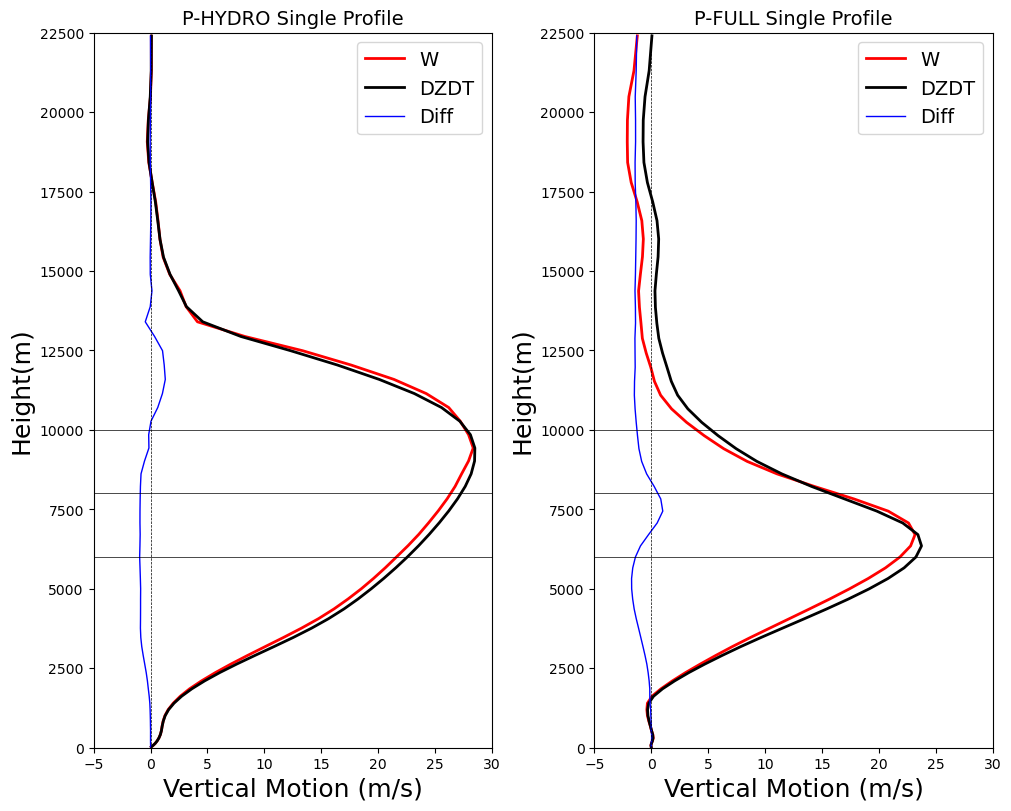

In [73]:
fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(10,8))

t0, i0, j0 = 15, 60, 127

plot_single_profile(phydro, 'w', t0, i0, j0, ax[0], 'r', 'W')
plot_single_profile(phydro, 'dzdt', t0, i0, j0, ax[0], 'k', 'DZDT')
plot_single_profile(phydro, 'diff', t0, i0, j0, ax[0], 'b', 'Diff' , linewidth=1.0)

t0, i0, j0 = 15, 57, 150
plot_single_profile(pfull, 'w', t0, i0, j0, ax[1], 'r', 'W')
plot_single_profile(pfull, 'dzdt', t0, i0, j0, ax[1], 'k', 'DZDT')
plot_single_profile(pfull, 'diff', t0, i0, j0, ax[1], 'b', 'Diff', linewidth=1.0)

ax[0].set_title("P-HYDRO Single Profile", fontsize=14)
ax[0].axhline(y=6000., color='k', linewidth=0.5, linestyle='-')
ax[0].axhline(y=8000., color='k', linewidth=0.5, linestyle='-')
ax[0].axhline(y=10000., color='k', linewidth=0.5, linestyle='-')
ax[0].axvline(x=0.0, color='k', linewidth=0.5, linestyle='--')
ax[0].legend(fontsize=14, loc='upper right')
ax[0].set_xlim(-5.0,30.)
ax[0].set_xlabel("%s" % "Vertical Motion (m/s)", fontsize=18)
ax[0].set_ylabel("Height(m)", fontsize=18)
ax[0].set_ylim(0.0,22500.)

ax[1].set_title("P-FULL Single Profile", fontsize=14)
ax[1].axhline(y=6000., color='k', linewidth=0.5, linestyle='-')
ax[1].axhline(y=8000., color='k', linewidth=0.5, linestyle='-')
ax[1].axhline(y=10000., color='k', linewidth=0.5, linestyle='-')
ax[1].axvline(x=0.0, color='k', linewidth=0.5, linestyle='--')
ax[1].legend(fontsize=14, loc='upper right')
ax[1].set_xlim(-5.0,30.)
ax[1].set_xlabel("%s" % "Vertical Motion (m/s)", fontsize=18)
ax[1].set_ylabel("Height(m)", fontsize=18)
ax[1].set_ylim(0.0,22500.)


In [64]:
pphydro = pickle2Obj('profiles/solo_squall_3km_35dbz_profiles.pkl',retObj=False)
ppfull = pickle2Obj('profiles/solo_squall_3km_fullp_35dbz_profiles.pkl',retObj=False)
ppfull['C2000_06'].keys()

dict_keys(['dbz', 'w', 'temp', 'theta', 'thetae', 'pert_t', 'pert_th', 'qv', 'pert_p', 'dzdt', 'tindex', 'size'])

In [65]:
#--------------------------------------------------------------------------------------------
def plot_profile(profile, var, ax, color, mlabel, linewidth=2.0, linestyle='solid'):

    zhgts = zhgts = 250. + 250.*np.arange(100)
    
    if var == 'diff':
        p = profile['w'].mean(axis=1) - profile['dzdt'].mean(axis=1)
    else:
        p     = profile[var].mean(axis=1)
        
    label = "%s" % (mlabel)       

    ax.plot(p, zhgts, color=color, linewidth=linewidth, label=label, linestyle=linestyle)


(0.0, 22500.0)

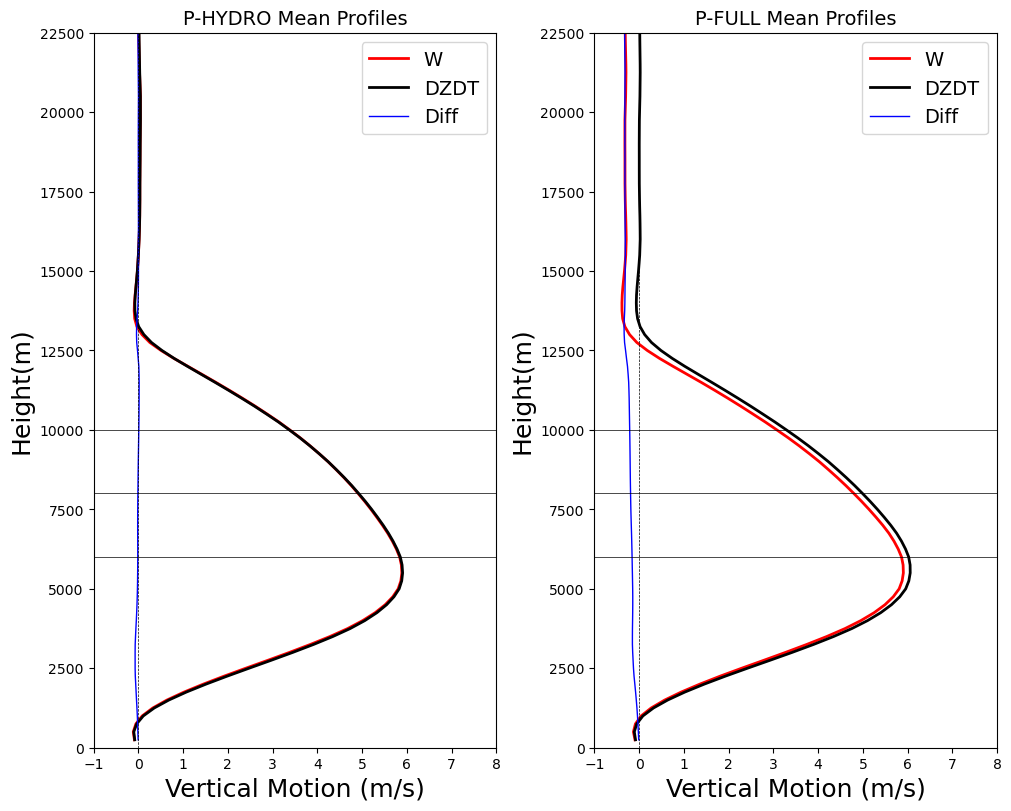

In [70]:
fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(10,8))

t0, i0, j0 = 15, 60, 127
label = 'C2000_06'

plot_profile(pphydro[label], 'w', ax[0], 'r', 'W')
plot_profile(pphydro[label], 'dzdt', ax[0], 'k', 'DZDT')
plot_profile(pphydro[label], 'diff', ax[0], 'b', 'Diff' , linewidth=1.0)

plot_profile(ppfull[label],    'w', ax[1], 'r', 'W')
plot_profile(ppfull[label], 'dzdt', ax[1], 'k', 'DZDT')
plot_profile(ppfull[label], 'diff', ax[1], 'b', 'Diff', linewidth=1.0)

ax[0].set_title("P-HYDRO Mean Profiles", fontsize=14)
ax[0].axhline(y=6000., color='k', linewidth=0.5, linestyle='-')
ax[0].axhline(y=8000., color='k', linewidth=0.5, linestyle='-')
ax[0].axhline(y=10000., color='k', linewidth=0.5, linestyle='-')
ax[0].axvline(x=0.0, color='k', linewidth=0.5, linestyle='--')
ax[0].legend(fontsize=14, loc='upper right')
ax[0].set_xlim(-1.0,8.)
ax[0].set_xlabel("%s" % "Vertical Motion (m/s)", fontsize=18)
ax[0].set_ylabel("Height(m)", fontsize=18)
ax[0].set_ylim(0.0,22500.)

ax[1].set_title("P-FULL Mean Profiles", fontsize=14)
ax[1].axhline(y=6000., color='k', linewidth=0.5, linestyle='-')
ax[1].axhline(y=8000., color='k', linewidth=0.5, linestyle='-')
ax[1].axhline(y=10000., color='k', linewidth=0.5, linestyle='-')
ax[1].axvline(x=0.0, color='k', linewidth=0.5, linestyle='--')
ax[1].legend(fontsize=14, loc='upper right')
ax[1].set_xlim(-1.0,8.)
ax[1].set_xlabel("%s" % "Vertical Motion (m/s)", fontsize=18)
ax[1].set_ylabel("Height(m)", fontsize=18)
ax[1].set_ylim(0.0,22500.)